In [2]:
# 1. 파이썬 코드에서 Matplotlib 폰트 설정
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import timedelta
from itertools import combinations
from collections import Counter

# 폰트 설정
plt.rc('font', family='Malgun Gothic')
# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print("한글 폰트 설정이 완료되었습니다.")


한글 폰트 설정이 완료되었습니다.


In [3]:
# 3. 데이터 로드 및 통합 (모든 문제 풀이의 시작점)
# dataframe 확인해라!
try:
    orders_df = pd.read_csv('../data/orders.csv')
    payments_df = pd.read_csv('../data/payments.csv')
    products_df = pd.read_csv('../data/products.csv')
    shipping_df = pd.read_csv('../data/shipping.csv')
    customers_df = pd.read_csv('../data/customers.csv')

    # 모든 데이터프레임 병합
    df = pd.merge(orders_df, payments_df, on='order_id', how='left')
    df = pd.merge(df, products_df, on='product_id', how='left')
    df = pd.merge(df, customers_df, on='customer_id', how='left')
    df = pd.merge(df, shipping_df, on='order_id', how='left')

    # 데이터 전처리
    date_cols = ['order_date', 'payment_date', 'join_date', 'shipping_start_date', 'shipping_end_date']
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    df['total_sales'] = df['quantity'] * df['price']
    
    print("데이터 로드 및 통합이 완료되었습니다.")

except FileNotFoundError as e:
    print(f"파일을 찾을 수 없습니다: {e}")


데이터 로드 및 통합이 완료되었습니다.


In [ ]:
# 문제 9: 신규 고객과 기존 고객이 주로 구매하는 상품 카테고리에 차이가 있는지 비교 분석하세요.
# 비즈니스 목적: 고객 유형에 따른 상품 추천 전략을 세우고, 신규 고객에게는 진입장벽이 낮은 상품을, 기존 고객에게는 새로운 카테고리의 상품을 제안하는 등의 전략을 구사합니다.

In [ ]:
# 출력 결과를 보고 코딩하세요
''' 
신규/기존 고객의 카테고리별 구매 비중 (%):
category              가구         도서      스포츠용품         식품         의류  \
customer_type                                                          
기존 고객          12.063351  10.832676  15.398855  15.539406  17.671660   
신규 고객          11.031175  11.870504  19.784173  12.709832  16.306954   

category            전자제품        화장품  
customer_type                        
기존 고객          14.668678  13.825375  
신규 고객          18.944844   9.352518
'''

###### 제시 출력결과 
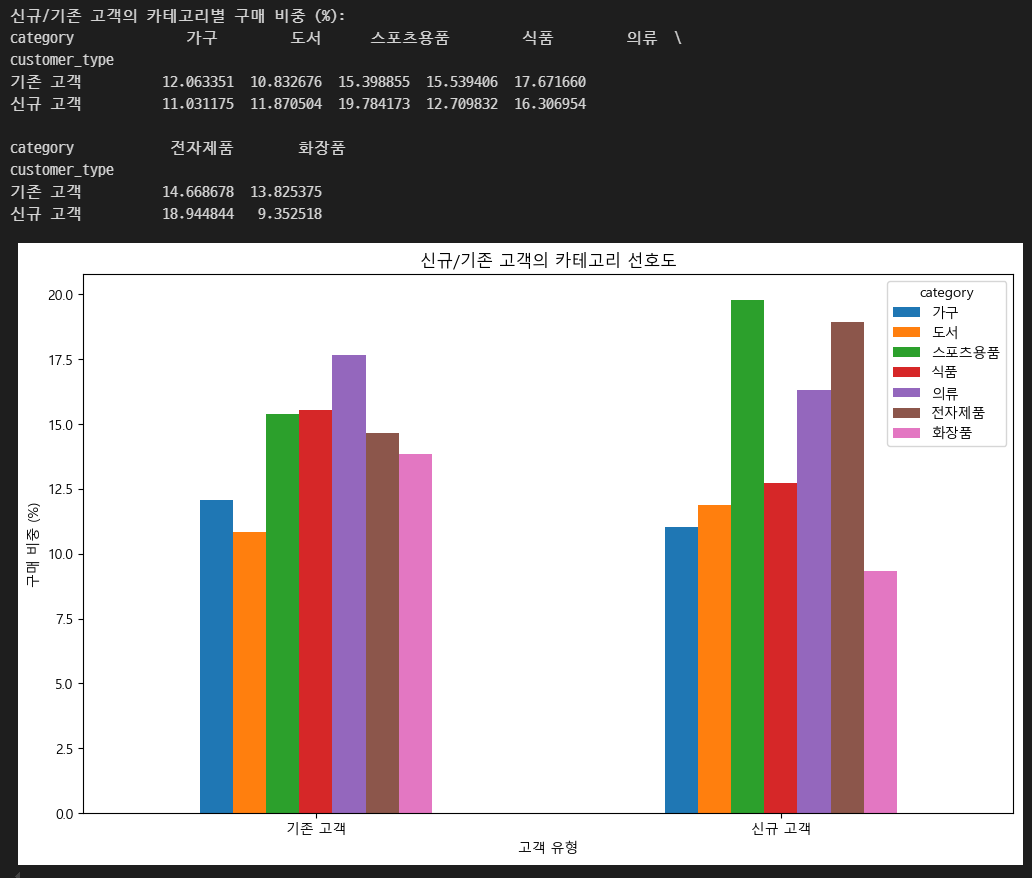

In [4]:
df.columns

Index(['order_id', 'customer_id', 'product_id', 'order_date', 'quantity',
       'payment_id', 'payment_method', 'payment_status', 'payment_date',
       'product_name', 'category', 'price', 'stock', 'name', 'gender', 'age',
       'join_date', 'city', 'shipping_id', 'shipping_company',
       'shipping_status', 'shipping_start_date', 'shipping_end_date',
       'total_sales'],
      dtype='object')

In [ ]:
# 필요한 데이터 분리
# 기존고객, 신규 고객(주문 1번만 한 고객) : np.where 가입한 달에 주문하면 신규 가입일과 주문일의 'YYYY-MM'으로 도출)
df_quest9 = df[['join_date', 'order_date', 'category', 'quantity']].copy()
# 가입월과 주문월을 구하고
df_quest9['join_month']  = df['join_date'].dt.to_period('M')
df_quest9['order_month'] = df['order_date'].dt.to_period('M')
# 가입월과 주문월이 같으면 신규 고객, 다르면 
